P3700 Lab 2

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import math
from scipy.io import wavfile
import IPython

All requested plots need to be fully labelled. In addition to functional code, please fully explain what you’re doing and declare variables either by commenting your code or using markdown cells. Don’t forget to include your wav files. Submit it to our course Moodle site.

0.Execution Time. We’ll now want to keep track of how long it takes processes to run. A simple way to do that is with the following bit of code. You won’t need to add it to all your functions, just put it in when you’re running/testing your complete code.

        import time
        time_start = time.process_time()
        #run your code
        time_elapsed = (time.process_time() - time_start)
        print("Run time: %5.3f s" % time_elapsed)

1.Convolution. Convolution

a) In the worksheets this week, you applied a moving average filter to a noisy square wave. You ended up doing something like a convolution, but you were free to implement it however you wanted. NumPy has a convolve function that convolves two lists. The function is simple, but write your own function myconv that performs the same operation. It should take two arguments that are lists and returns a list which is the convolution of the input lists. You can use the equation shown in the slides for convolution as reference.

$$ y[i] = \sum_{j=0}^{M-1}h[j]x[i-j] $$

In [190]:
def myconv(x,h):
    i = 0
    lst = []
    while (i < (len(x)*2-1)):
        j=0
        value = 0
        while (j < len(h)):
            if ((i-j)>=0) and ((i-j)<len(x)):
                value = value + h[j]*x[i-j]
            j+=1
        lst.append(value)
        i+=1
    return lst
        

In [50]:
time_start = time.process_time()
x = [1,2,3]
h = [0,1,0.5]
print (myconv(x,h))
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.5f s" % time_elapsed)

[0, 1, 2.5, 4.0, 1.5]
Run time: 0.00054 s


(b) Three common filter types applied with convolution that are relatively simple are the exponential, the square pulse (moving average) and the sinc function. They were shown in this weeks slides. Write six functions, one for each filter. Write a high-pass and a low-pass version of each of the three. The only argument the functions should take are the sample length and it should return a list representing the filter kernel (impulse response). Here are a few points to keep in mind.

i. The impulses in a low-pass filter should add to one.

ii. The sinc function is supposed to be centred at zero, but for now negative samples don’t mean anything so shift your function to be centred in the sampling window.

iii. High-pass versions of these filters are made by making every value in the low-pass sample negative while leaving one sample positive. For the exponential, it’s the first sample, for the square and sinc filter it’s the central sample. You’re basically taking a delta function and subtracting the low-pass impulse function to produce a high-pass filter.

iv. The impulses in a high-pass filters should sum to zero.

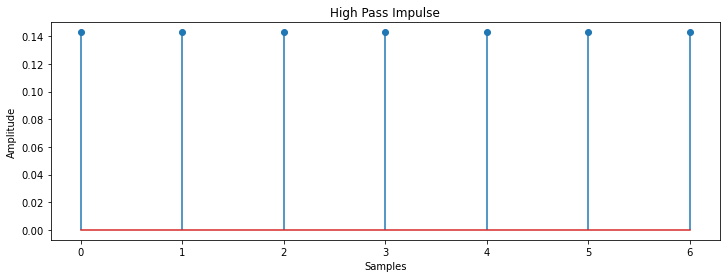

0.9999999999999998


In [151]:
def l_p_imp(num):
    return 1/num*np.ones(num)
    
low_pass_impulse = l_p_imp(7)

plt.figure(figsize=(12,4))
plt.title('High Pass Impulse')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(low_pass_impulse)
plt.show()

print (sum(low_pass_impulse))

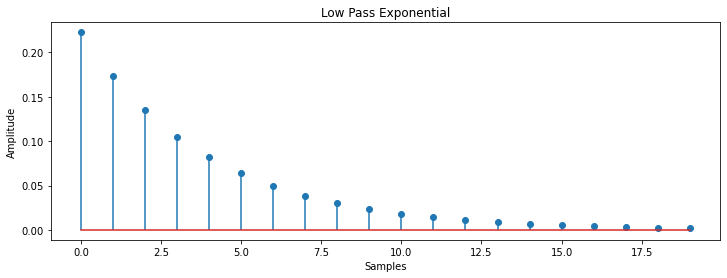

1.0000000000000002


In [155]:
def l_p_expo(num):
    lst = [np.exp(-n) for n in np.arange(0,(num-1)/4,.25)]
    return lst/sum(lst)

low_pass_expo = l_p_expo(21)

plt.figure(figsize=(12,4))
plt.title('Low Pass Exponential')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(low_pass_expo)
plt.show()

print (sum(low_pass_expo))

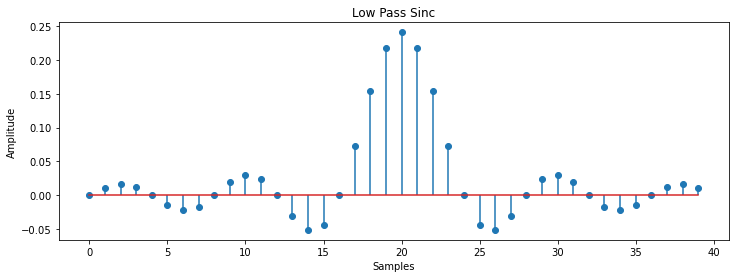

1.0


In [209]:
def l_p_sinc(num):
    num = [np.sinc(n) for n in np.arange(-(num-1)/4,(num-1)/4,.25)]
    return num/sum(num)

low_pass_sinc = l_p_sinc(21)

plt.figure(figsize=(12,4))
plt.title('Low Pass Sinc')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(low_pass_sinc)
plt.show()

print (sum(low_pass_sinc))

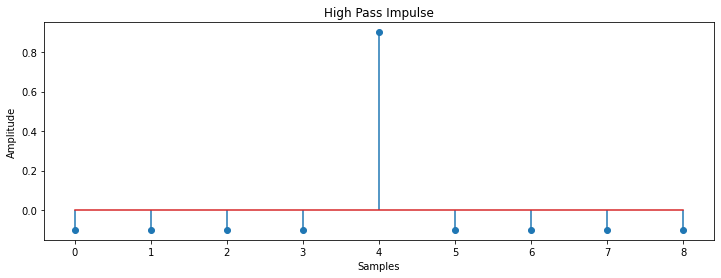

0.09999999999999992


In [212]:
def h_p_imp(num):
    ones = np.ones(num)
    hpi = [-.1*n for n in ones]
    hpi[math.floor(num/2)] = abs(sum(hpi))
    return hpi


hi_pass_impulse = h_p_imp(9)
plt.figure(figsize=(12,4))
plt.title('High Pass Impulse')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(hi_pass_impulse)
plt.show()

print (sum(hi_pass_impulse))

2.181643567984642


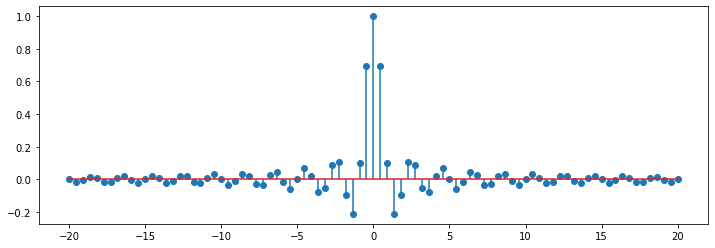

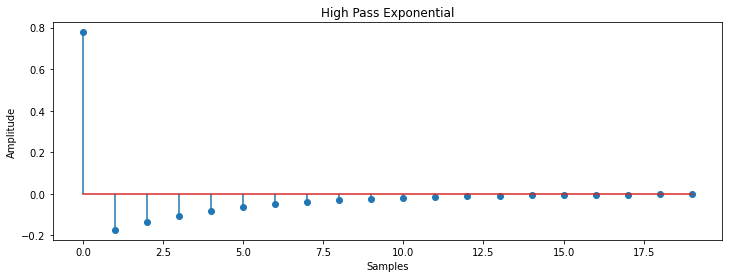

1.3856103764364747e-16


In [187]:
def h_p_expo(num):
    lst = [np.exp(-n) for n in np.arange(0,(num-1)/4,.25)]
    lst = lst/(-1*sum(lst))
    sum_neg = sum(lst) - lst[0]
    lst[0] = abs(sum_neg)
    return lst

high_pass_expo = h_p_expo(21)

plt.figure(figsize=(12,4))
plt.title('High Pass Exponential')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(high_pass_expo)
plt.show()

print(sum(high_pass_expo))

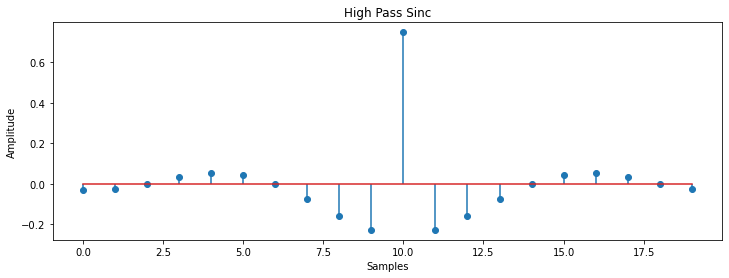

1.457167719820518e-16


In [208]:
def h_p_sinc(num):
    lst = np.arange(-(num-1)/8,(num-1)/8,1/4)
    value_sinc = [np.sinc(n) for n in lst]
    value_sinc = value_sinc/(-1*sum(value_sinc))
    sum_value_sinc = sum(value_sinc)-value_sinc[math.floor(num/2)]  
    value_sinc[math.floor(num/2)] = abs(sum_value_sinc)
    return value_sinc

high_pass_sinc = h_p_sinc(21)

plt.figure(figsize=(12,4))
plt.title('High Pass Sinc')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.stem(high_pass_sinc)
plt.show()

print(sum(high_pass_sinc))

(c) Generate a 5 Hz square wave with scipy.signal.square. Sample at 1000 Hz and add uniform noise between −0.3 and 0.3. Plot the wave.

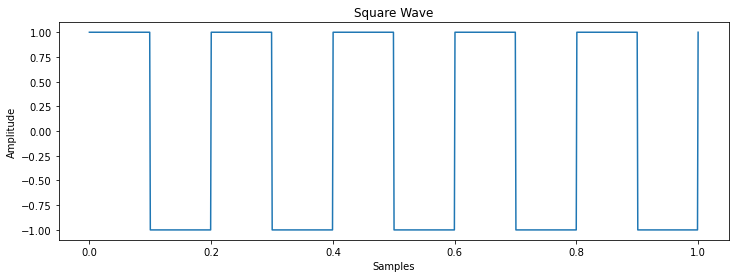

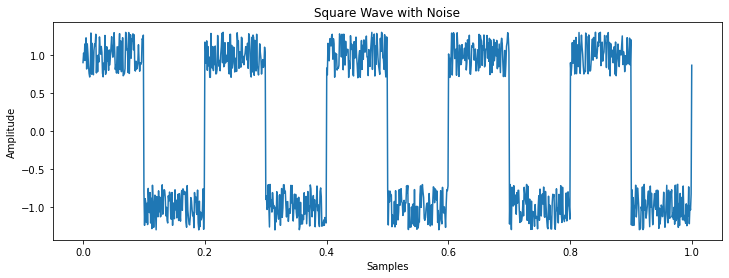

In [143]:
t = np.linspace(0, 1, 1000)

sq_wave = signal.square(2 * np.pi * 5 * t)
noise = np.random.uniform(-.3,.3,1000)
sq_wave_noisy = sq_wave + noise

plt.figure(figsize=(12,4))
plt.title('Square Wave')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(t,sq_wave)
plt.show()

plt.figure(figsize=(12,4))
plt.title('Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(t,sq_wave_noisy)
plt.show()


(d) Apply your low-pass square filter to the noisy square wave with two different kernel lengths, 7 and 31. Plot the filtered waves. Describe the differences between the two resultant square waves.

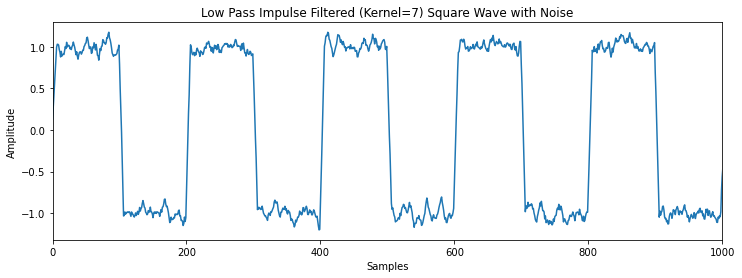

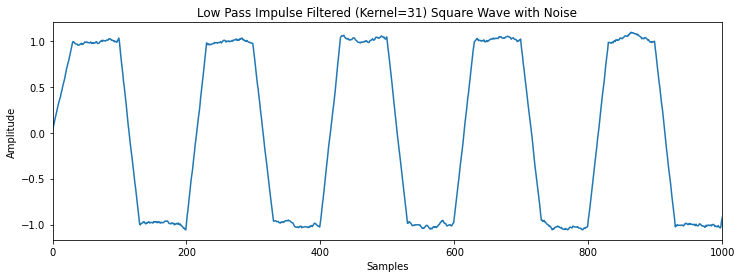

In [210]:
lp_imp_filtered_31 = myconv(sq_wave_noisy,l_p_imp(31))
lp_imp_filtered_7 = myconv(sq_wave_noisy,l_p_imp(7))

plt.figure(figsize=(12,4))
plt.title('Low Pass Impulse Filtered (Kernel=7) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(lp_imp_filtered_7)
plt.xlim(0,1000)
plt.show()

plt.figure(figsize=(12,4))
plt.title('Low Pass Impulse Filtered (Kernel=31) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.xlim(0,1000)
plt.plot(lp_imp_filtered_31)
plt.show()


(e) Apply your low-pass exponential and sinc filters, both with kernel length 21. Plot the filtered waves. Describe any differences in the resulting square waves.

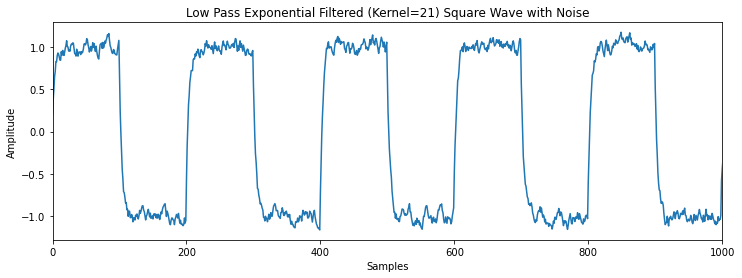

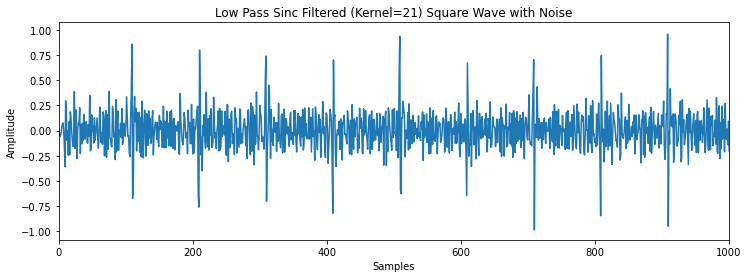

In [205]:
lp_exp_filtered_21 = myconv(sq_wave_noisy,l_p_expo(21))
lp_sinc_filtered_21 = myconv(sq_wave_noisy,l_p_sinc(21))

plt.figure(figsize=(12,4))
plt.title('Low Pass Exponential Filtered (Kernel=21) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(lp_exp_filtered_21)
plt.xlim(0,1000)
plt.show()

plt.figure(figsize=(12,4))
plt.title('Low Pass Sinc Filtered (Kernel=21) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.xlim(0,1000)
plt.plot(lp_sinc_filtered_21)
plt.show()

2.181643567984642


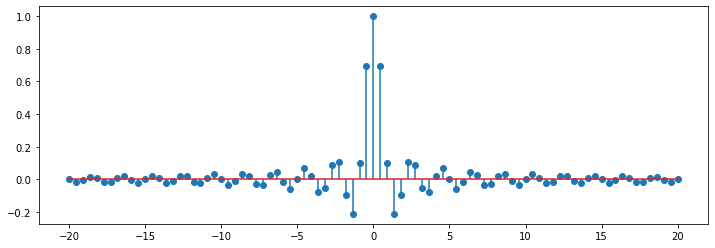

(f) Apply your high-pass square, exponential and sinc filters, all with kernel length 21. Plot the filtered waves. Describe any differences in the resulting square waves.

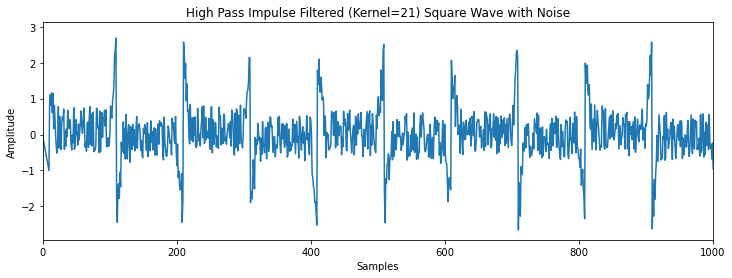

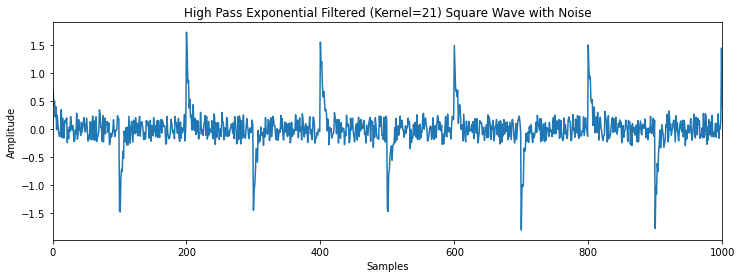

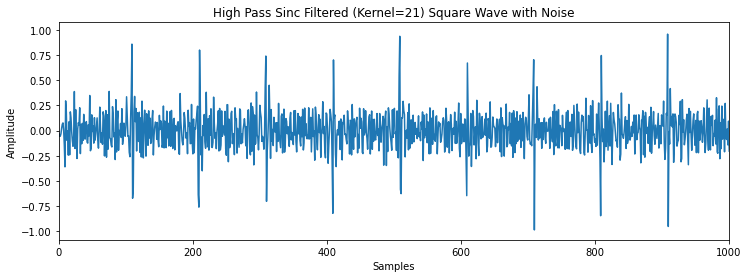

In [213]:
hp_exp_filtered_21 = myconv(sq_wave_noisy,h_p_expo(21))
hp_sinc_filtered_21 = myconv(sq_wave_noisy,h_p_sinc(21))
hp_imp_filtered_21 = myconv(sq_wave_noisy,h_p_imp(21))

plt.figure(figsize=(12,4))
plt.title('High Pass Impulse Filtered (Kernel=21) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(hp_imp_filtered_21)
plt.xlim(0,1000)
plt.show()

plt.figure(figsize=(12,4))
plt.title('High Pass Exponential Filtered (Kernel=21) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(hp_exp_filtered_21)
plt.xlim(0,1000)
plt.show()

plt.figure(figsize=(12,4))
plt.title('High Pass Sinc Filtered (Kernel=21) Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.xlim(0,1000)
plt.plot(hp_sinc_filtered_21)
plt.show()

(g) Finally, apply your low-pass square filter to the noisy square wave with kernel length 11, 4 consecutive times. Plot the filtered waves. Describe any differences between applying it only once.

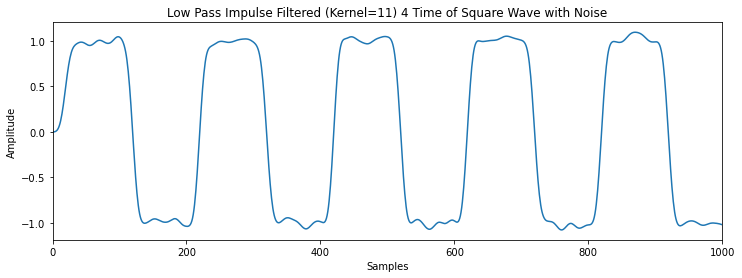

In [216]:
wave = sq_wave_noisy

i = 0
while (i<4):
    wave = myconv(wave,l_p_imp(11)) 
    i+=1
plt.figure(figsize=(12,4))
plt.title('Low Pass Impulse Filtered (Kernel=11) 4 Time of Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(wave)
plt.xlim(0,1000)
plt.show()


2.Making Music. You may have generated audible tones in previous labs using a function generator. In this part of the lab, you’ll generate them with Python. You will first generate pure tone sin waves, then chords, then noisy chords. You’ll then filter out the noise from the chord and finally filter out individual tones from the chords. A number of notes and their respective frequencies are shown below.

                                     B - 246.94 Hz
                                     C - 261.63 Hz
                                     D - 293.66 Hz
                                     E - 329.63 Hz
                                     F - 349.23 Hz
                                     G - 392.00 Hz
                                     A - 440.00 Hz

(a) Produce 7 different sin waves, each with a frequency shown above. Each sin wave should be sampled at 48000 Hz, have an amplitude of 25000 and contain  ̃500 cycles. It’ll be easiest if all your sin waves have the same number of samples.

In [312]:
fb = 246.94
fc = 261.63
fd = 293.66
fe = 329.63
ff = 349.23
fg = 392.00
fa = 440.00

fs=48000
def sound(f):
    fs=48000
    t = np.arange(0,1/f*500, 1/fs)
    return [25000*np.sin(f*2*np.pi*n) for n in t]

myB = sound(fb)
myC = sound(fc)
myD = sound(fd)
myE = sound(fe)
myF = sound(ff)
myG = sound(fg)
myA = sound(fa)

(b) Write out the C wave to a wav file and play it to make sure things are running properly.


In [301]:
data_my_b = np.asarray(myB,dtype=np.int16)
wavfile.write('myb.wav',fs,data_my_b)
data_my_c = np.asarray(myC,dtype=np.int16)
wavfile.write('myc.wav',fs,data_my_c)
data_my_d = np.asarray(myD,dtype=np.int16)
wavfile.write('myd.wav',fs,data_my_d)
data_my_e = np.asarray(myE,dtype=np.int16)
wavfile.write('mye.wav',fs,data_my_e)
data_my_f = np.asarray(myF,dtype=np.int16)
wavfile.write('myf.wav',fs,data_my_f)
data_my_g = np.asarray(myG,dtype=np.int16)
wavfile.write('myg.wav',fs,data_my_g)
data_my_a = np.asarray(myA,dtype=np.int16)
wavfile.write('mya.wav',fs,data_my_a)

In [302]:
IPython.display.Audio("myb.wav")

In [303]:
IPython.display.Audio("myc.wav")

In [304]:
IPython.display.Audio("myd.wav")

In [305]:
IPython.display.Audio("mye.wav")

In [306]:
IPython.display.Audio("myf.wav")

In [307]:
IPython.display.Audio("myg.wav")

In [308]:
IPython.display.Audio("mya.wav")

(c) A chord is a set of notes played together. By summing the proper sin waves, produce the following 4 chords. (i) CEG, (ii) BDG, (iii) CEA, (iv) CFA. You will have to divide each sum by 3 to normalize the sound levels. Save each chord to a different wav file.

In [328]:
chord_CEG = []
for n1,n2,n3 in zip(myC,myE,myG):
    chord_CEG.append((n1+n2+n3)/3 )

chord_BDG = []
for n1,n2,n3 in zip(myB,myD,myG):
    chord_BDG.append((n1+n2+n3)/3 )
    
chord_CEA = []
for n1,n2,n3 in zip(myC,myE,myA):
    chord_CEA.append((n1+n2+n3)/3 )
    
chord_CFA = []
for n1,n2,n3 in zip(myC,myF,myA):
    chord_CFA.append((n1+n2+n3)/3 )


In [323]:
data_chord_CEG = np.asarray(chord_CEG,dtype=np.int16)
wavfile.write('chordCEG.wav',fs,data_chord_CEG)

In [324]:
IPython.display.Audio("chordCEG.wav")

(d) Merge the 4 chords (in the above order) into one list and write the series of chords to a 5th wav file. Listen to the wav file to make sure you’re doing things correctly.

(e) Add some normally distributed noise to each sample in your merged list with
       
       np.random.normal(0,150)
       
Save this noisy version and listen to it.


(f) Using one of the filter functions you wrote in question 1, try to filter the noise back out. In your notebook, be clear as to which filter you’re using and how big your filter kernel is. Save your filtered wav file.

(g) Take your CFA and filter out everything except the F note. You will need to apply a bandpass filter with:

       b, a = signal.butter(4, [LOWFREQEDGE/22000,HIGHFREQEDGE/22000], ’band’)
       ONLYF = signal.filtfilt(b, a, CFA)
       
You will have to select LOWFREQEDGE and HIGHFREQEDGE yourself. Listen and write out the wav file.

3.Correlation. Correlation is a mathematical operation that uses two signals to produce a third signal. This third signal is called the cross-correlation of the two input signals. If a signal is correlated with itself, the resulting signal is instead called the autocorrelation. The amplitude of each sample in the cross-correlation signal is a measure of how much the received signal resembles the target signal, at that location. The cross-correlation signal is used to identify signals in data. The following equation calculates the cross-correlation r between x and y:

$$ r[i] = \sum_{j=0}^{M-1}x[j]y[i+j] $$

(a) Write a function to perform the cross-correlation shown above. Your function should take two lists and return a list which is the cross correlation of the two input lists. NumPy has a correlate function that convolves two lists. You can use it to check your function.


(b) xcor_data.csv contains one column of data. In that data are two sinc functions and some noise. Read the data into Python and plot the data. The horizontal axis can just be sample number.

(c) Find the location of the centre of each sinc function (sample number) and orientation (right-side up or up-side down) using your correlation function. You can use the numpy sinc function. The “hidden” sinc functions have 81 sample points where −6 ≤ x < 6.

(d) Plot the sinc function you’re looking for and the cross-correlated signal.